In [2]:
%matplotlib notebook
import os 
from importlib import reload
import numpy as np
os.chdir("/u/phg/adas")

import atomdat.adas.ibal_phg as ibal; reload(ibal)
import utils.plot as pu; reload(pu)

<module 'utils.plot' from '/u/phg/grid/utils/plot.py'>

In [3]:
N = 100
te = np.logspace(np.log10(5e-1),np.log10(1e3),N)
ne = np.ones(N)*1E20

te,fz,lz,raw_lz,_,_ = ibal.calc_fz_extra('c',te=te,ne=ne)

<IPython.core.display.Javascript object>


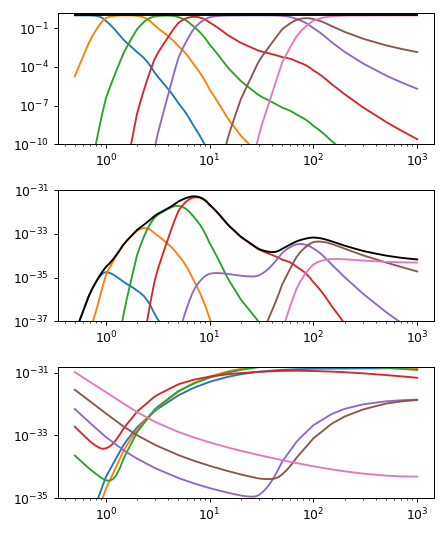

In [6]:
import matplotlib.pyplot as plt 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(5,6))

for sfz in fz.T:
    ax1.plot(te, sfz)
ax1.plot(te, fz.sum(axis=1), c="k")
    
for slz in lz.T:
    ax2.plot(te, slz)
ax2.plot(te, lz.sum(axis=1), c="k")
    
for slz in raw_lz.T:
    ax3.plot(te, slz)
#ax3.plot(te, raw_lz.sum(axis=1), c="k")

ax1.set_xscale("log"); ax1.set_yscale("log")
ax1.set_ylim((1e-10, 1.5))
ax2.set_xscale("log"); ax2.set_yscale("log")
ax2.set_ylim((1e-37, 0.1e-30))
ax3.set_xscale("log"); ax3.set_yscale("log")
ax3.set_ylim((1e-35, 0.15e-30))

fig.tight_layout()

In [5]:
lcol = ['k','b','g','y','orange','r','violet','brown','gray']
import utils.colors as colors; reload(colors); clrs = colors.clrs()
def phg_plot_lz(x, y, fig=None, ax=None, labels=None, 
                scale_is_log=True, ylabel="L$^z$ [$\mathrm{Wm}^{3}}$]", skipcols=100*[0], **kwargs):
    nz = y.shape[1] # ionisations
    if fig is None:
        fig = plt.figure()
    if ax is None: 
        ax = fig.gca()

    col = clrs.resetnull()
    clrs2 = [clrs.next() for i in range(4)]
    clrs45 = [clrs.next(), clrs.next()]
    clrs2 += clrs45[::-1]
    #clrs.next()
    clrs2.extend([clrs.next() for i in range(4)])
    
    j = 0
    for i in range(nz):    
        label = labels[i] if labels is not None else None
        ax.plot(x,y[:,i],c=clrs2[j], label=label, **kwargs)
        j += skipcols[i]+1
        #ax.plot(x,y[:,i],c=lcol[i], label=label, **kwargs)
    
    ax.set_xlabel('T$_e$ [eV]')
    ax.set_ylabel(ylabel)
    if scale_is_log:
        ax.set_yscale('log')
    ax.set_xscale('log')
    
    if labels is not None:
        ax.legend()
    return fig

In [60]:
col = clrs.resetnull()
clrs2 = [clrs.next() for i in range(4)]
clrs45 = [clrs.next(), clrs.next()]
clrs2 += clrs45[::-1]
#clrs.next()
clrs2.extend([clrs.next() for i in range(4)])

<IPython.core.display.Javascript object>


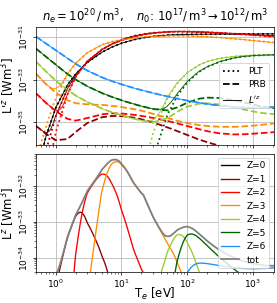

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


In [104]:
%matplotlib notebook
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4.3,4.7))

N = 1000
lw = [2,1.5]
te = np.logspace(np.log10(5e-1),np.log10(2.1e3),N)
labels = [f"Z={i}" for i in range(10)]
extralabels = [r"$n_e=10^{20}\,/\,\mathrm{m}^3,\quad n_0\colon~$"
               r"$10^{17}/\,\mathrm{m}^3 \,\to\, 10^{12}/\,\mathrm{m}^3$", None]
ylims = [(0.9e-36, 3e-31), (4e-35, 0.8e-31)]
ylabels = [r"L'$^z$ [$\mathrm{Wm}^{3}}$]", r"L$^z$ [$\mathrm{Wm}^{3}}$]"]

ne = np.ones(N)*1e20
n0 = np.minimum(1e17, 1e21 * te**(-3))
te,fz,lz,raw_lz,oplt,oprb = ibal.calc_fz_extra('c', te=te, ne=ne, n0=n0)
xx=oplt
# plot 1
_ = phg_plot_lz(te, oplt, fig=fig, ax=axs[0], lw=lw[0], ls=":", 
                scale_is_log=True, labels=[r"PLT",None,None,None,None,None,None])
_ = phg_plot_lz(te, oprb, fig=fig, ax=axs[0], lw=lw[0], ls="--", 
                scale_is_log=True, labels=[r"PRB",None,None,None,None,None,None])
_ = phg_plot_lz(te, raw_lz, fig=fig, ax=axs[0], lw=1, ls="-", 
                scale_is_log=True, labels=[r"$L'^z$",None,None,None,None,None,None])
axs[0].legend(loc=7)
# raw_lz = np.array([raw_lz[:,0], raw_lz[:,4], raw_lz[:,6]]).T
# oplt = np.array([oplt[:,0], oplt[:,4], oplt[:,6]]).T
# oprb = np.array([oprb[:,0], oprb[:,4], oprb[:,6]]).T
# _ = phg_plot_lz(te, oplt, fig=fig, ax=axs[0], lw=lw[0], ls=":", 
#                 scale_is_log=True, labels=[r"PLT",None,None,None], skipcols=[3,1,0])
# _ = phg_plot_lz(te, oprb, fig=fig, ax=axs[0], lw=lw[0], ls="--", 
#                 scale_is_log=True, labels=[r"PRB",None,None,None], skipcols=[3,1,0])
# _ = phg_plot_lz(te, raw_lz, fig=fig, ax=axs[0], lw=1, ls="-", 
#                 scale_is_log=True, labels=[r"$L'^z_{\,}$",None,None,None], skipcols=[3,1,0])
# axs[0].legend(loc=1)
# axs0 = axs[0].twinx()
# axs0.plot([1,2], [1,2], c=clrs2[0], lw=lw[1], label="Z=0")
# axs0.plot([1,2], [1,2], c=clrs2[4], lw=lw[1], label="Z=4")
# axs0.plot([1,2], [1,2], c=clrs2[6], lw=lw[1], label="Z=6")
# axs0.set_ylim(-1,0)
# axs0.axes.yaxis.set_ticklabels([])
# axs0.axes.yaxis.set_visible(False)
# axs0.legend(loc=4)



# plot 2
_ = phg_plot_lz(te, lz, fig=fig, ax=axs[1], lw=lw[1], ls="-", labels=labels)
axs[1].plot(te, lz.sum(axis=1), color="gray", label="tot", lw=2)
axs[1].legend(loc=7)


axs[0].set_xlabel(None)
axs[1].set_xlabel("$\mathrm{T}_e~[\mathrm{eV}]$", va="center", fontsize=13)
for i, (ax, exl, yl, ylb) in enumerate(zip(axs, extralabels, ylims, ylabels)):
    ax.set_ylabel(ylb, va="baseline", fontsize=13)
    if i==0:
        ax.set_title(exl, va="baseline", fontsize=13)
    elif exl is not None:
        ax.set_title(exl, va="baseline", fontsize=13)
        
#     ax.set_ylim(0,1)
    ax.set_xlim(.5,2100)
    ax.grid(True)
    ax.set_ylim(yl)
    tempvals = ["$10^{"+v+"}$" for v in np.log10(ax.get_yticks()).astype("int").astype("str")]
    ax.set_yticklabels(tempvals, rotation = 90, verticalalignment='center')
#     ax.set_yticks([0,0.333,0.667,1])
#     ax.set_yticklabels([0,"$\\frac{1}{3}$","$\\frac{2}{3}$",1])

fig.tight_layout()
fig.subplots_adjust(left=0.13, right=0.99, bottom = 0.1, hspace=0.08)

<IPython.core.display.Javascript object>


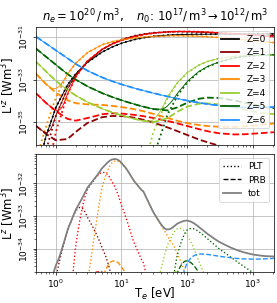

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator


In [99]:
%matplotlib notebook
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4.3,4.7))

N = 1000
lw = [2,1.5]
te = np.logspace(np.log10(5e-1),np.log10(2.1e3),N)
labels = [f"Z={i}" for i in range(10)]
extralabels = [r"$n_e=10^{20}\,/\,\mathrm{m}^3,\quad n_0\colon~$"
               r"$10^{17}/\,\mathrm{m}^3 \,\to\, 10^{12}/\,\mathrm{m}^3$", None]
ylims = [(0.9e-36, 3e-31), (2e-35, 0.8e-31)]
ylabels = [r"L'$^z$ [$\mathrm{Wm}^{3}}$]", r"L$^z$ [$\mathrm{Wm}^{3}}$]"]

ne = np.ones(N)*1e20
n0 = np.minimum(1e17, 1e21 * te**(-3))
te,fz,lz,raw_lz,oplt,oprb = ibal.calc_fz_extra('c', te=te, ne=ne, n0=n0)
# plot 1
_ = phg_plot_lz(te, oplt, fig=fig, ax=axs[0], lw=lw[0], ls=":", 
                scale_is_log=True, labels=[None,None,None,None,None,None,None])
_ = phg_plot_lz(te, oprb, fig=fig, ax=axs[0], lw=lw[0], ls="--", 
                scale_is_log=True, labels=[None,None,None,None,None,None,None])
_ = phg_plot_lz(te, raw_lz, fig=fig, ax=axs[0], lw=1, ls="-", 
                scale_is_log=True, labels=None)
_ = phg_plot_lz(te, 0*raw_lz, fig=fig, ax=axs[0], lw=2, ls="-", 
                scale_is_log=True, labels=["Z=0","Z=1","Z=2","Z=3","Z=4","Z=5","Z=6"])
axs[0].legend(loc=1)



# plot 2
pltpart, prbpart = oplt/raw_lz, oprb/raw_lz
_ = phg_plot_lz(te, lz*pltpart, fig=fig, ax=axs[1], lw=lw[1], ls=":", 
                labels=["PLT",None,None,None,None,None,None])
_ = phg_plot_lz(te, lz*prbpart, fig=fig, ax=axs[1], lw=lw[1], ls="--", 
                labels=["PRB",None,None,None,None,None,None])
axs[1].plot(te, lz.sum(axis=1), color="gray", label="tot", lw=2)
axs[1].legend(loc=1)


axs[0].set_xlabel(None)
axs[1].set_xlabel("$\mathrm{T}_e~[\mathrm{eV}]$", va="center", fontsize=13)
for i, (ax, exl, yl, ylb) in enumerate(zip(axs, extralabels, ylims, ylabels)):
    ax.set_ylabel(ylb, va="baseline", fontsize=13)
    if i==0:
        ax.set_title(exl, va="baseline", fontsize=13)
    elif exl is not None:
        ax.set_title(exl, va="baseline", fontsize=13)
        
#     ax.set_ylim(0,1)
    ax.set_xlim(.5,2100)
    ax.grid(True)
    ax.set_ylim(yl)
    tempvals = ["$10^{"+v+"}$" for v in np.log10(ax.get_yticks()).astype("int").astype("str")]
    ax.set_yticklabels(tempvals, rotation = 90, verticalalignment='center')
#     ax.set_yticks([0,0.333,0.667,1])
#     ax.set_yticklabels([0,"$\\frac{1}{3}$","$\\frac{2}{3}$",1])

fig.tight_layout()
fig.subplots_adjust(left=0.13, right=0.99, bottom = 0.1, hspace=0.08)

In [105]:
fig.savefig("/u/phg/adas/images/lzplot-lztick-alt2.pdf")
fig.savefig("/u/phg/adas/images/lzplot-lztick-alt2.png", dpi=200)
#fig.savefig("/u/phg/adas/images/lzplot-lztick-alt.pdf")
#fig.savefig("/u/phg/adas/images/lzplot-lztick-alt.png", dpi=200)
# fig.savefig("/u/phg/adas/images/lzplot-lztick.pdf")
# fig.savefig("/u/phg/adas/images/lzplot-lztick.png", dpi=200)

In [70]:
fig.show()

<IPython.core.display.Javascript object>


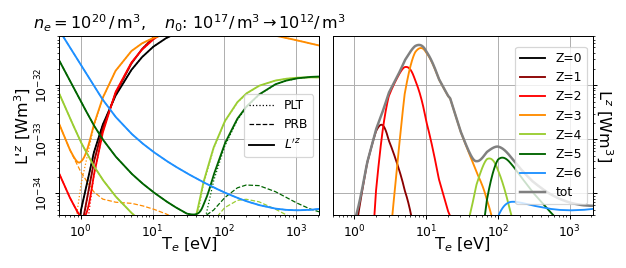

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator


In [22]:
%matplotlib notebook
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(7,3))
N = 1000
lw = [1,1.5, 1.5]
te = np.logspace(np.log10(5e-1),np.log10(2.1e3),N)
labels = [f"Z={i}" for i in range(10)]
extralabels = [r"$n_e=10^{20}\,/\,\mathrm{m}^3,\quad n_0\colon~$"
               r"$10^{17}/\,\mathrm{m}^3 \,\to\, 10^{12}/\,\mathrm{m}^3$", None]
ylims = [(0.9e-36, 3e-31), (4e-35, 0.8e-31)]
ylabels = [r"L'$^z$ [$\mathrm{Wm}^{3}}$]", r"L$^z$ [$\mathrm{Wm}^{3}}$]"]

ne = np.ones(N)*1e20
n0 = np.minimum(1e17, 1e21 * te**(-3))
te,fz,lz,raw_lz,oplt,oprb = ibal.calc_fz_extra('c', te=te, ne=ne, n0=n0)
xx=oplt
# plot 1
_ = phg_plot_lz(te, oplt, fig=fig, ax=axs[0], lw=lw[0], ls=":", 
                scale_is_log=True, labels=[r"PLT",None,None,None,None,None,None])
_ = phg_plot_lz(te, oprb, fig=fig, ax=axs[0], lw=lw[0], ls="--", 
                scale_is_log=True, labels=[r"PRB",None,None,None,None,None,None])
_ = phg_plot_lz(te, raw_lz, fig=fig, ax=axs[0], lw=lw[2], ls="-", 
                scale_is_log=True, labels=[r"$L'^z$",None,None,None,None,None,None])
axs[0].legend(loc=7)
# raw_lz = np.array([raw_lz[:,0], raw_lz[:,4], raw_lz[:,6]]).T
# oplt = np.array([oplt[:,0], oplt[:,4], oplt[:,6]]).T
# oprb = np.array([oprb[:,0], oprb[:,4], oprb[:,6]]).T
# _ = phg_plot_lz(te, oplt, fig=fig, ax=axs[0], lw=lw[0], ls=":", 
#                 scale_is_log=True, labels=[r"PLT",None,None,None], skipcols=[3,1,0])
# _ = phg_plot_lz(te, oprb, fig=fig, ax=axs[0], lw=lw[0], ls="--", 
#                 scale_is_log=True, labels=[r"PRB",None,None,None], skipcols=[3,1,0])
# _ = phg_plot_lz(te, raw_lz, fig=fig, ax=axs[0], lw=1, ls="-", 
#                 scale_is_log=True, labels=[r"$L'^z_{\,}$",None,None,None], skipcols=[3,1,0])
# axs[0].legend(loc=1)
# axs0 = axs[0].twinx()
# axs0.plot([1,2], [1,2], c=clrs2[0], lw=lw[1], label="Z=0")
# axs0.plot([1,2], [1,2], c=clrs2[4], lw=lw[1], label="Z=4")
# axs0.plot([1,2], [1,2], c=clrs2[6], lw=lw[1], label="Z=6")
# axs0.set_ylim(-1,0)
# axs0.axes.yaxis.set_ticklabels([])
# axs0.axes.yaxis.set_visible(False)
# axs0.legend(loc=4)



# plot 2
_ = phg_plot_lz(te, lz, fig=fig, ax=axs[1], lw=lw[1], ls="-", labels=labels)
axs[1].plot(te, lz.sum(axis=1), color="gray", label="tot", lw=2)
axs[1].legend(loc=7)


axs[0].set_xlabel(None)
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
for i, (ax, exl, yl, ylb) in enumerate(zip(axs, extralabels, ylims, ylabels)):
    axs[i].set_xlabel("$\mathrm{T}_e~[\mathrm{eV}]$", va="center", fontsize=13)
    ax.set_ylabel(ylb, va="baseline", fontsize=13, rotation=180*i+90)
    if i==0:
        ax.set_title(exl, va="baseline", fontsize=13)
    elif exl is not None:
        ax.set_title(exl, va="baseline", fontsize=13)
        
#     ax.set_ylim(0,1)
    ax.set_xlim(.5,2100)
    ax.grid(True)
    ax.set_ylim(yl)
    tempvals = ["$10^{"+v+"}$" for v in np.log10(ax.get_yticks()).astype("int").astype("str")]
    ax.set_yticklabels(tempvals, rotation=180*i+90, verticalalignment='center')
#     ax.set_yticks([0,0.333,0.667,1])
#     ax.set_yticklabels([0,"$\\frac{1}{3}$","$\\frac{2}{3}$",1])

fig.tight_layout()
#fig.subplots_adjust(left=0.13, right=0.99, bottom = 0.1, hspace=0.08)

In [25]:
%matplotlib notebook
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6,4))

N = 1000
lw = [2,1.5]
te = np.logspace(np.log10(5e-1),np.log10(2.1e3),N)
labels = [f"Z={i}" for i in range(10)]
extralabels = [r"$n_e=10^{20}\,/\,\mathrm{m}^3,\quad n_0\colon~$"
               r"$10^{17}/\,\mathrm{m}^3 \,\to\, 10^{12}/\,\mathrm{m}^3$", None]
ylims = [(0.9e-36, 3e-31), (4e-35, 0.8e-31)]
ylabels = [r"L'$^z$ [$\mathrm{Wm}^{3}}$]", r"L$^z$ [$\mathrm{Wm}^{3}}$]"]

ne = np.ones(N)*1e20
n0 = np.minimum(1e17, 1e21 * te**(-3))
te,fz,lz,raw_lz,oplt,oprb = ibal.calc_fz_extra('c', te=te, ne=ne, n0=n0)
xx=oplt
# plot 1
_ = phg_plot_lz(te, oplt, fig=fig, ax=axs[0], lw=lw[0], ls=":", 
                scale_is_log=True, labels=[r"PLT",None,None,None,None,None,None])
_ = phg_plot_lz(te, oprb, fig=fig, ax=axs[0], lw=lw[0], ls="--", 
                scale_is_log=True, labels=[r"PRB",None,None,None,None,None,None])
_ = phg_plot_lz(te, raw_lz, fig=fig, ax=axs[0], lw=1, ls="-", 
                scale_is_log=True, labels=[r"$L'^z$",None,None,None,None,None,None])
axs[0].legend(loc=7)



# plot 2
_ = phg_plot_lz(te, lz, fig=fig, ax=axs[1], lw=lw[1], ls="-", labels=labels)
axs[1].plot(te, lz.sum(axis=1), color="gray", label="tot", lw=2)
axs[1].legend(loc=7)


axs[0].set_xlabel(None)
axs[1].set_xlabel("$\mathrm{T}_e~[\mathrm{eV}]$", va="center", fontsize=13)
for i, (ax, exl, yl, ylb) in enumerate(zip(axs, extralabels, ylims, ylabels)):
    ax.set_ylabel(ylb, va="baseline", fontsize=13)
    if i==0:
        ax.set_title(exl, va="baseline", fontsize=13)
    elif exl is not None:
        ax.set_title(exl, va="baseline", fontsize=13)
        
#     ax.set_ylim(0,1)
    ax.set_xlim(.5,2500)
    ax.grid(True)
    ax.set_ylim(yl)
    tempvals = ["$10^{"+v+"}$" for v in np.log10(ax.get_yticks()).astype("int").astype("str")]
    ax.set_yticklabels(tempvals, rotation = 90, verticalalignment='center')
#     ax.set_yticks([0,0.333,0.667,1])
#     ax.set_yticklabels([0,"$\\frac{1}{3}$","$\\frac{2}{3}$",1])

fig.tight_layout()
fig.subplots_adjust(left=0.13, right=0.99, bottom = 0.1, hspace=0.08)

<IPython.core.display.Javascript object>

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
